# Advanced Geospatial Plotting

## 01. Import Libraries
## 02. Import Data
## 03. Data Wrangling/Preprocessing
## 04. PLot the Map
## 05. Export Data

## 01. Import Libraries

In [1]:
#!pip install KeplerGl==0.3.7

In [2]:
import pandas as pd
import numpy as np
import os
from keplergl import KeplerGl
from pyproj import CRS
from matplotlib import pyplot as plt

#Install the requirements **keplergl**
#conda install -c conda-forge keplergl

## 02. Import Data

In [3]:
df = pd.read_csv("SeabornViz.csv")

In [4]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge,value
0,B42E6C17AF007611,classic_bike,2022-01-01,2022-01-01 00:25:03,Hoboken Terminal - River St & Hudson Pl,HB102,Adams St & 2 St,HB407,40.736068,-74.029127,40.739814,-74.036904,member,11.6,592,both,1
1,D5C9BBDBC66CEBF6,classic_bike,2022-01-01,2022-01-01 13:57:13,14 St Ferry - 14 St & Shipyard Ln,HB202,Hoboken Terminal - River St & Hudson Pl,HB102,40.752961,-74.024353,40.736068,-74.029127,member,11.6,592,both,1
2,F7D69E45F52F0ECA,electric_bike,2022-01-01,2022-01-02 00:34:32,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Brunswick & 6th,JC081,40.736982,-74.027781,40.726012,-74.050389,casual,11.6,592,both,1


In [5]:
#Check the dimensions 
df.shape

(895485, 17)

In [6]:
#Move the index back to a regular column in the dataframe **If need to**
#df.reset_index(inplace=True)

#Drop the index
df = df.reset_index(drop=True)

In [7]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge,value
0,B42E6C17AF007611,classic_bike,2022-01-01,2022-01-01 00:25:03,Hoboken Terminal - River St & Hudson Pl,HB102,Adams St & 2 St,HB407,40.736068,-74.029127,40.739814,-74.036904,member,11.6,592,both,1
1,D5C9BBDBC66CEBF6,classic_bike,2022-01-01,2022-01-01 13:57:13,14 St Ferry - 14 St & Shipyard Ln,HB202,Hoboken Terminal - River St & Hudson Pl,HB102,40.752961,-74.024353,40.736068,-74.029127,member,11.6,592,both,1
2,F7D69E45F52F0ECA,electric_bike,2022-01-01,2022-01-02 00:34:32,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Brunswick & 6th,JC081,40.736982,-74.027781,40.726012,-74.050389,casual,11.6,592,both,1


In [8]:
#Check the dimensions 
df.shape

(895485, 17)

In [9]:
df.columns.tolist()

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual',
 'avgTemp',
 'daily_bike_rides',
 '_merge',
 'value']

## 03. Data Wrangling/Preprocessing

In [10]:
print(df.shape)

(895485, 17)


In [11]:
#Check for missing values
df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name      10
start_station_id        10
end_station_name      3204
end_station_id        3204
start_lat                0
start_lng                0
end_lat               1970
end_lng               1970
member_casual            0
avgTemp                  0
daily_bike_rides         0
_merge                   0
value                    0
dtype: int64

In [12]:
#Locate the missing values
df[df['start_station_name'].isnull() & df['end_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge,value
805107,BD0EC67EDCFC2E65,classic_bike,2022-11-10,2022-11-10 20:13:05,NaN,NaN,NaN,NaN,40.74,-74.03,40.72,-74.05,casual,12.6,3190,both,1
805108,E08E1BB778EB4CFD,classic_bike,2022-11-10,2022-11-10 16:09:38,NaN,NaN,NaN,NaN,40.74,-74.03,40.74,-74.03,member,12.6,3190,both,1
807118,E1376856B2B40ED4,classic_bike,2022-11-11,2022-11-11 09:49:37,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,16.4,1675,both,1
808956,F0D1334BD5FB8520,classic_bike,2022-11-12,2022-11-12 08:32:03,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,19.7,3779,both,1
808957,217DDED37E5C6C83,classic_bike,2022-11-12,2022-11-12 13:56:07,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,19.7,3779,both,1
809337,B3231280404C96CD,classic_bike,2022-11-12,2022-11-12 21:40:41,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,19.7,3779,both,1
809339,95BA78454BF7CF5E,classic_bike,2022-11-12,2022-11-12 20:39:23,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,19.7,3779,both,1
809340,151E4996C9C7512D,classic_bike,2022-11-12,2022-11-12 18:48:57,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,19.7,3779,both,1
812065,5851BFAC140A82B4,classic_bike,2022-11-13,2022-11-13 16:30:25,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,12.9,2215,both,1
813932,EEEE26A65B2E8818,classic_bike,2022-11-13,2022-11-13 17:49:18,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,12.9,2215,both,1


In [13]:
# Separate missing values into a new DataFrame
df_missing = df[df['start_station_name'].isnull() & df['end_station_name'].isnull()]

In [14]:
df_missing.head(4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge,value
805107,BD0EC67EDCFC2E65,classic_bike,2022-11-10,2022-11-10 20:13:05,NaN,NaN,NaN,NaN,40.74,-74.03,40.72,-74.05,casual,12.6,3190,both,1
805108,E08E1BB778EB4CFD,classic_bike,2022-11-10,2022-11-10 16:09:38,NaN,NaN,NaN,NaN,40.74,-74.03,40.74,-74.03,member,12.6,3190,both,1
807118,E1376856B2B40ED4,classic_bike,2022-11-11,2022-11-11 09:49:37,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,16.4,1675,both,1
808956,F0D1334BD5FB8520,classic_bike,2022-11-12,2022-11-12 08:32:03,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,19.7,3779,both,1


In [15]:
df_missing.shape

(10, 17)

In [16]:
df_missing.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge,value
805107,BD0EC67EDCFC2E65,classic_bike,2022-11-10,2022-11-10 20:13:05,NaN,NaN,NaN,NaN,40.74,-74.03,40.72,-74.05,casual,12.6,3190,both,1
805108,E08E1BB778EB4CFD,classic_bike,2022-11-10,2022-11-10 16:09:38,NaN,NaN,NaN,NaN,40.74,-74.03,40.74,-74.03,member,12.6,3190,both,1
807118,E1376856B2B40ED4,classic_bike,2022-11-11,2022-11-11 09:49:37,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,16.4,1675,both,1
808956,F0D1334BD5FB8520,classic_bike,2022-11-12,2022-11-12 08:32:03,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,19.7,3779,both,1
808957,217DDED37E5C6C83,classic_bike,2022-11-12,2022-11-12 13:56:07,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,19.7,3779,both,1
809337,B3231280404C96CD,classic_bike,2022-11-12,2022-11-12 21:40:41,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,19.7,3779,both,1
809339,95BA78454BF7CF5E,classic_bike,2022-11-12,2022-11-12 20:39:23,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,19.7,3779,both,1
809340,151E4996C9C7512D,classic_bike,2022-11-12,2022-11-12 18:48:57,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,19.7,3779,both,1
812065,5851BFAC140A82B4,classic_bike,2022-11-13,2022-11-13 16:30:25,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,12.9,2215,both,1
813932,EEEE26A65B2E8818,classic_bike,2022-11-13,2022-11-13 17:49:18,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,12.9,2215,both,1


In [17]:
# Drop the missing values from the original DataFrame
df_cleaned = df.dropna(subset=['start_station_name', 'end_station_name'], how='all')

In [18]:
df_cleaned.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge,value
0,B42E6C17AF007611,classic_bike,2022-01-01,2022-01-01 00:25:03,Hoboken Terminal - River St & Hudson Pl,HB102,Adams St & 2 St,HB407,40.736068,-74.029127,40.739814,-74.036904,member,11.6,592,both,1
1,D5C9BBDBC66CEBF6,classic_bike,2022-01-01,2022-01-01 13:57:13,14 St Ferry - 14 St & Shipyard Ln,HB202,Hoboken Terminal - River St & Hudson Pl,HB102,40.752961,-74.024353,40.736068,-74.029127,member,11.6,592,both,1
2,F7D69E45F52F0ECA,electric_bike,2022-01-01,2022-01-02 00:34:32,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Brunswick & 6th,JC081,40.736982,-74.027781,40.726012,-74.050389,casual,11.6,592,both,1


In [19]:
df_cleaned.shape

(895475, 17)

In [20]:
df.shape

(895485, 17)

In [21]:
df_cleaned.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name      3194
end_station_id        3194
start_lat                0
start_lng                0
end_lat               1970
end_lng               1970
member_casual            0
avgTemp                  0
daily_bike_rides         0
_merge                   0
value                    0
dtype: int64

In [22]:
#Locate the missing values
df[df['end_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge,value
332,149B51B8B9F73D22,classic_bike,2022-01-01,2022-01-02 01:12:01,4 St & Grand St,HB301,NaN,NaN,40.742258,-74.035111,40.75,-74.03,casual,11.6,592,both,1
338,FE32F6BA1CB7B40D,classic_bike,2022-01-01,2022-01-02 17:57:19,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,NaN,NaN,40.736982,-74.027781,NaN,NaN,member,11.6,592,both,1
340,40265EEDBCBCDBBD,classic_bike,2022-01-01,2022-01-01 00:52:46,6 St & Grand St,HB302,NaN,NaN,40.744398,-74.034501,40.75,-74.03,casual,11.6,592,both,1
364,03E3DC89B1577D14,classic_bike,2022-01-01,2022-01-02 17:37:01,Hoboken Terminal - River St & Hudson Pl,HB102,NaN,NaN,40.736068,-74.029127,NaN,NaN,casual,11.6,592,both,1
399,9DBED738169A7A3F,electric_bike,2022-01-01,2022-01-02 11:22:13,Newport PATH,JC066,NaN,NaN,40.727224,-74.033759,40.71,-74.04,member,11.6,592,both,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895203,3E0EFA23F7BE9835,classic_bike,2022-12-31,2023-01-01 02:37:10,12 St & Sinatra Dr N,HB201,NaN,NaN,40.750604,-74.024020,NaN,NaN,casual,8.2,983,both,1
895209,0F636ACF3E5A9D49,classic_bike,2022-12-31,2022-12-31 14:06:55,Newark Ave,JC032,NaN,NaN,40.721397,-74.046290,40.72,-74.05,member,8.2,983,both,1
895211,AFC04E109BFC4A09,classic_bike,2022-12-31,2022-12-31 13:53:13,Newark Ave,JC032,NaN,NaN,40.721325,-74.046109,40.72,-74.05,member,8.2,983,both,1
895215,031B9B28D5A11098,docked_bike,2022-12-31,2023-01-01 02:51:53,12 St & Sinatra Dr N,HB201,NaN,NaN,40.750604,-74.024020,NaN,NaN,casual,8.2,983,both,1


In [23]:
#Drop the rows where 'end_station_name' has a value of NA and assign the result to a new DataFrame
df_cleaned2 = df.dropna(subset=['end_station_name'])

In [24]:
df_cleaned2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge,value
0,B42E6C17AF007611,classic_bike,2022-01-01,2022-01-01 00:25:03,Hoboken Terminal - River St & Hudson Pl,HB102,Adams St & 2 St,HB407,40.736068,-74.029127,40.739814,-74.036904,member,11.6,592,both,1
1,D5C9BBDBC66CEBF6,classic_bike,2022-01-01,2022-01-01 13:57:13,14 St Ferry - 14 St & Shipyard Ln,HB202,Hoboken Terminal - River St & Hudson Pl,HB102,40.752961,-74.024353,40.736068,-74.029127,member,11.6,592,both,1
2,F7D69E45F52F0ECA,electric_bike,2022-01-01,2022-01-02 00:34:32,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Brunswick & 6th,JC081,40.736982,-74.027781,40.726012,-74.050389,casual,11.6,592,both,1
3,56E148D263A0B8F2,classic_bike,2022-01-01,2022-01-01 01:20:05,Columbus Drive,JC014,Hilltop,JC019,40.718355,-74.038914,40.731169,-74.057574,casual,11.6,592,both,1
4,2F3A132B6C4F781D,electric_bike,2022-01-01,2022-01-01 18:51:41,Adams St & 2 St,HB407,Hoboken Terminal - River St & Hudson Pl,HB102,40.739814,-74.036904,40.736068,-74.029127,member,11.6,592,both,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895480,94C8DAAF9BFDCBB1,electric_bike,2022-12-31,2022-12-31 20:21:52,Leonard Gordon Park,JC080,Journal Square,JC103,40.745910,-74.057271,40.733670,-74.062500,member,8.2,983,both,1
895481,2A348523AA32C0E8,classic_bike,2022-12-31,2022-12-31 14:37:04,Hoboken Ave at Monmouth St,JC105,12 St & Sinatra Dr N,HB201,40.735208,-74.046964,40.750604,-74.024020,casual,8.2,983,both,1
895482,29BA5F630B6A4006,electric_bike,2022-12-31,2022-12-31 07:07:34,Marin Light Rail,JC013,Columbus Dr at Exchange Pl,JC106,40.714584,-74.042817,40.716870,-74.032810,member,8.2,983,both,1
895483,A49839919AEBE76D,electric_bike,2022-12-31,2022-12-31 16:18:11,Fairmount Ave,JC093,Columbus Dr at Exchange Pl,JC106,40.725726,-74.071959,40.716870,-74.032810,casual,8.2,983,both,1


In [25]:
df_cleaned2.shape

(892281, 17)

In [26]:
df_cleaned2.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
avgTemp               0
daily_bike_rides      0
_merge                0
value                 0
dtype: int64

In [27]:
#Check the number of unique values
df_cleaned2['ride_id'].nunique()

892281

In [28]:
#Created a dataframe with selected columns
#Select Columns
df_select = df_cleaned2[['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng']]

In [29]:
df_select.head(3)

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng
0,Hoboken Terminal - River St & Hudson Pl,Adams St & 2 St,40.736068,-74.029127,40.739814,-74.036904
1,14 St Ferry - 14 St & Shipyard Ln,Hoboken Terminal - River St & Hudson Pl,40.752961,-74.024353,40.736068,-74.029127
2,South Waterfront Walkway - Sinatra Dr & 1 St,Brunswick & 6th,40.736982,-74.027781,40.726012,-74.050389


In [30]:
df_select.shape

(892281, 6)

In [31]:
#Create a value **If need to **
df_cleaned2['value']=1

/var/folders/62/xltcnc5n7d97j6t5ql_87vym0000gn/T/ipykernel_9129/4108249603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['value']=1


In [32]:
#Groupby the start and the end stations and count the occurrence  
df_group = df_cleaned2.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [33]:
df_group.head(3)

,start_station_name,end_station_name,value
0,11 St & Washington St,11 St & Washington St,1132
1,11 St & Washington St,12 Ave & W 40 St,1
2,11 St & Washington St,12 St & Sinatra Dr N,253


In [34]:
#Check the result - Compare the sum of the value column with the total number of rows
print(df_group['value'].sum())

892281


In [35]:
print(df_cleaned2.shape)

(892281, 17)


In [36]:
#Check the data stats
df_group['value'].describe()

count    6953.000000
mean      128.330361
std       304.091182
min         1.000000
25%         7.000000
50%        28.000000
75%       118.000000
max      5565.000000
Name: value, dtype: float64

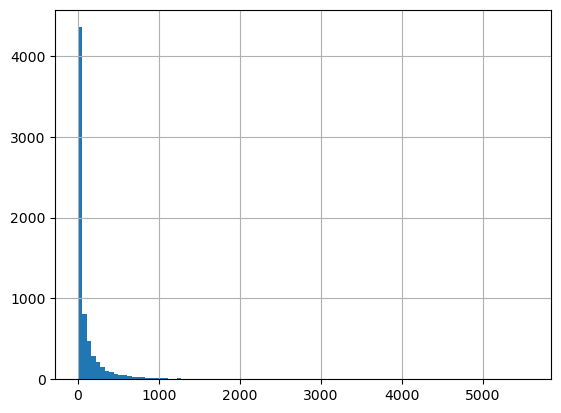

In [37]:
#Create a histogram - Exploratory analysis **about the trips**
df_group['value'].hist(bins = 100)
plt.show()

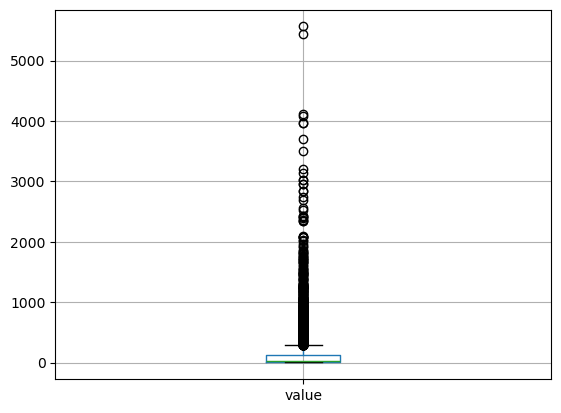

In [38]:
#Create a boxplot - Exploratory analysis **about the trips**
df_group.boxplot(column = 'value') 
plt.show()

In [39]:
#Sort the vlaues by the its indext and return the frequency  of each unique value 
df_group['value'].sort_index().value_counts()

value
1       676
2       281
3       194
4       187
5       153
       ... 
634       1
1447      1
2345      1
644       1
768       1
Name: count, Length: 800, dtype: int64

In [40]:
df_group.head(3)

,start_station_name,end_station_name,value
0,11 St & Washington St,11 St & Washington St,1132
1,11 St & Washington St,12 Ave & W 40 St,1
2,11 St & Washington St,12 St & Sinatra Dr N,253


In [41]:
df_select.head(3)

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng
0,Hoboken Terminal - River St & Hudson Pl,Adams St & 2 St,40.736068,-74.029127,40.739814,-74.036904
1,14 St Ferry - 14 St & Shipyard Ln,Hoboken Terminal - River St & Hudson Pl,40.752961,-74.024353,40.736068,-74.029127
2,South Waterfront Walkway - Sinatra Dr & 1 St,Brunswick & 6th,40.736982,-74.027781,40.726012,-74.050389


In [42]:
#Merge the aggregated dataframe at both **start_station_name and end_station_name**
df_merged = pd.merge(df_select, df_group, on=['start_station_name', 'end_station_name'], how='left', indicator = 'merge')

In [43]:
df_merged.head(3)

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,value,merge
0,Hoboken Terminal - River St & Hudson Pl,Adams St & 2 St,40.736068,-74.029127,40.739814,-74.036904,854,both
1,14 St Ferry - 14 St & Shipyard Ln,Hoboken Terminal - River St & Hudson Pl,40.752961,-74.024353,40.736068,-74.029127,1153,both
2,South Waterfront Walkway - Sinatra Dr & 1 St,Brunswick & 6th,40.736982,-74.027781,40.726012,-74.050389,106,both


In [44]:
df_merged['merge'].value_counts(dropna = False)

merge
both          892281
left_only          0
right_only         0
Name: count, dtype: int64

In [45]:
df_merged.drop(columns = {'merge'}, inplace = True)

In [46]:
df_merged.head(3)

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,value
0,Hoboken Terminal - River St & Hudson Pl,Adams St & 2 St,40.736068,-74.029127,40.739814,-74.036904,854
1,14 St Ferry - 14 St & Shipyard Ln,Hoboken Terminal - River St & Hudson Pl,40.752961,-74.024353,40.736068,-74.029127,1153
2,South Waterfront Walkway - Sinatra Dr & 1 St,Brunswick & 6th,40.736982,-74.027781,40.726012,-74.050389,106


In [47]:
#Rename the value column to trips **make it more clear 
df_merged.rename(columns = {'value' : 'trips'}, inplace = True)

In [48]:
df_merged.nunique()

start_station_name       84
end_station_name        320
start_lat             65444
start_lng             68060
end_lat                 398
end_lng                 397
trips                   800
dtype: int64

In [49]:
df_merged.shape

(892281, 7)

In [50]:
#Exprt the dataframe
df_merged.to_csv('df_final_map.csv')

In [51]:
#Garbage collector - freeing up memory to speeds up performance
import gc 
gc.collect()

10840

## 04. Plot the Map

In [65]:
#Create/Initialize KeplerGl instance
map = KeplerGl(height = 700, data={"data_1": df_merged})

#Or map = KeplerGl(height = 700)`
#kepler.add_data(df_merged, "Bike trips aggregated)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [66]:
#Check
map

KeplerGl(data={'data_1':                                   start_station_name  \
0            Hoboken Terminal…

# Observations

+ The map has three layers: the start point, end point, and start-end arc.
+ The color blue is chosen for the start point of the trip.
+ The color green is chosen for the end point of the trip.
+ The radius is set to 10 for both start and end points.
+ The arc from the source, in purple, to the target, in yellow, shows the trip from beginning to end.
+ The stroke is set to 1 to ensure other arcs are as visible as possible.

#### At this point, we can see that the trips occur between New York and New Jersey, with many more trips within New Jersey. 

# Observations

+ A filter was added to the map based on the number of trips, ranging from 1 to 999.
+ When filtering for less frequent trips, we observe+  that most trips occur in New York, while the most frequent trips are in New Jersey.
+ For instance, filtering trips from 1 to around ~20 shows no trips in New York, with all occurring within New Jersey.
+ Any trip greater than 21 is within New Jersey.
+ New York trips are mostly one-time occurrences. 
+ For example, West Thames St. is the endpoint station in New York that starts from Washington St. station in New Jersey.
+ West Thames St. station is near Broadway and other landmarks.
+ Washington St. station is near Downtown Newark and The Newark Museum of Art.

#### This suggests that most trips are taken by tourists visiting between the two states and their landmark destinations.
#### Overall, the most popular stations are located near the coasts of New York and New Jersey, with most trips consisting of 1-2 occurrences.

In [72]:
#Create a config object and save the output **object to save the settings with the map**
config = map.config

#save the output of the kepler.gl config method

In [73]:
#Check
config

{'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['data_1'],
     'id': '4f4puz8bx',
     'name': ['trips'],
     'type': 'range',
     'value': [1, 3],
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'view': 'side',
     'speed': 1,
     'enabled': True}],
   'layers': [{'id': 'zou4y5h',
     'type': 'point',
     'config': {'dataId': 'data_1',
      'label': 'start',
      'color': [112, 180, 183],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'start_lat', 'lng': 'start_lng'},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.5,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'str

In [75]:
#Save the config file **save the setting in a separate file 
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

## 05. Export Data

In [76]:
#Export the map in  HTML format
map.save_to_html(file_name = 'New York Citi Bike Trips Aggregated.html', read_only = False, config = config)

Map saved to New York Citi Bike Trips Aggregated.html!
